<a href="https://colab.research.google.com/github/rdaniel58/Image-Processing/blob/main/Final_RyanBaertlein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CS 3150.001**

Coin Detection and Counter

Ryan Baertlein

12/01/2022

 ...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Original Dimensions :  (372, 612, 3)
Scale percent: 1.0
Resized Dimensions :  (372, 612, 3)



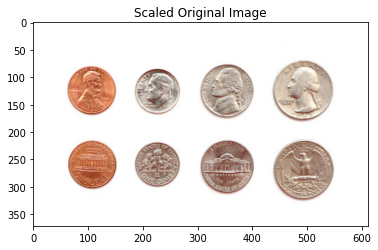

In [ ]:
import numpy as np
import cv2 
import math
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
import math

# Load in image of coins
image = cv2.imread('/content/drive/MyDrive/coins.png')
#image = cv2.imread('/content/drive/MyDrive/coins2.png')
#image = cv2.imread('/content/drive/MyDrive/coins3.png')
#image = cv2.imread('/content/drive/MyDrive/coins4.png')
#image = cv2.imread('/content/drive/MyDrive/coins5.png')

# Resize image
print('Original Dimensions : ',image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');
w, h = np.shape(gray)
scale_percent = 612 / h # percent of original size
print("Scale percent: " + str(scale_percent))
width = int(image.shape[1] * scale_percent)
height = int(image.shape[0] * scale_percent)
dim = (width, height)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ', image.shape)
print()
# Display scaled image that will be used
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Scaled Original Image')
plt.show()

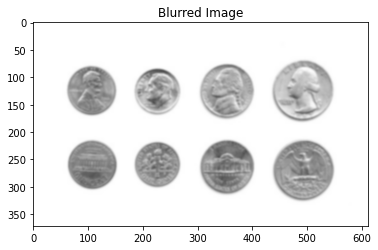

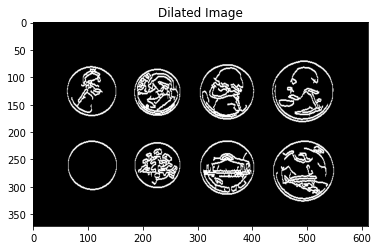

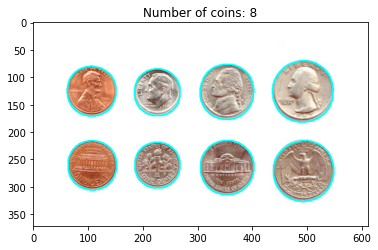

In [ ]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Use Gaussian blur to smooth image
blur = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(blur, cmap='gray')

# Display the blurred image
plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.show()

# Use Canny edge detection
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

# Dilate the image
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated, cmap='gray')

# Display the image
plt.imshow(cv2.cvtColor(dilated,cv2.COLOR_BGR2RGB))
plt.title('Dilated Image')
plt.show()

# Count the number of coins 
(count, heirarchy) = cv2.findContours(dilated.copy(), 
                                      cv2.RETR_EXTERNAL, 
                                      cv2.CHAIN_APPROX_NONE)

# Draw the contours around the coins
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, count, -1, (0,255,255), 2)

# Display the image
plt.imshow(rgb)
title = "Number of coins: " + str(len(count))
plt.title(title)
plt.show()

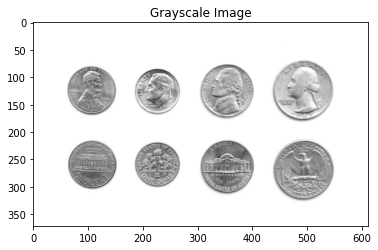

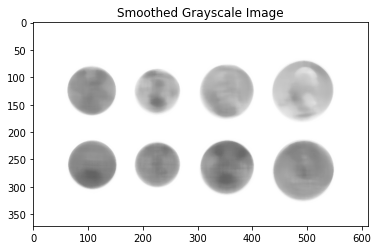

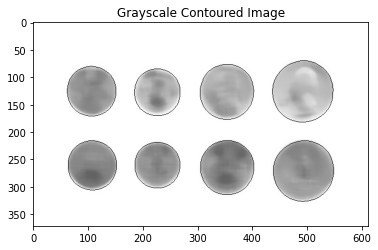

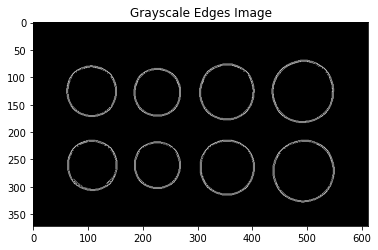

In [ ]:
# Display the grayscale image
gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title('Grayscale Image')
plt.imshow(gray,cmap='gray', vmin=0, vmax=255) 

# Display the grayscale median blur image
median = cv2.medianBlur(gray, 19)
plt.figure()
plt.title('Smoothed Grayscale Image')
plt.imshow(median,cmap='gray', vmin=0, vmax=255) 

# Display the grayscale contours image
contours = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
cv2.drawContours(contours, count, -1, (0,0,0), 1)
plt.figure()
plt.title('Grayscale Contoured Image')
plt.imshow(contours,cmap='gray', vmin=0, vmax=255)

# Display the grayscale edges image
edges=cv2.Canny(contours,250,280)
plt.figure()
plt.title('Grayscale Edges Image')
plt.imshow(edges,cmap='gray', vmin=0, vmax=255)

Max radius: 56

Radius: 56
Coin color: (172.0, 143.0, 126.0)

Radius: 56
Coin color: (205.0, 188.0, 169.0)

Radius: 46
Coin color: (201.0, 119.0, 85.0)

Radius: 50
Coin color: (155.0, 118.0, 106.0)

Radius: 42
Coin color: (161.0, 130.0, 116.0)

Radius: 46
Coin color: (185.0, 101.0, 66.0)

Radius: 43
Coin color: (162.0, 148.0, 139.0)

Radius: 49
Coin color: (186.0, 170.0, 157.0)



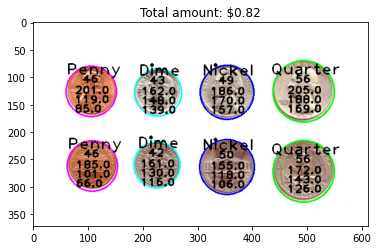

In [ ]:
# Declare variable to retain the total money amount
amount = 0.0

# Round a tulple array of integers to one tenth
def round_num(num):
  lst = list(num)
  for i in lst:
    lst[lst.index(i)] = math.ceil(num) * 10 / 10
  return tuple(lst)

# Get the average color within  a coin
def get_avg_color(x, y, r):
  red = 0
  green = 0
  blue = 0
  square = math.floor(1/2 * r * math.sqrt(2))
  for i in range(square):
     for j in range(square):
        red += image[(y-10+i), (x-10+j)][2]
        green += image[(y-10+i), (x-10+j)][1]
        blue += image[(y-10+i), (x-10+j)][0]
  red = math.ceil(red / (square * square)) * 10 / 10
  green = math.ceil(green / (square * square)) * 10 / 10
  blue = math.ceil(blue / (square * square)) * 10 / 10
  average_color = (red, green, blue)
  return average_color

# Determine which coin is being used
def determine_coin(max_radius, radius, average_color, font, fontSize, color, fontThickness):
  ratio = radius / max_radius
  if (ratio >= 0.95):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-45, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 255, 0), 2)
      cv2.putText(output, "Quarter", (x-60, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
    return 0.25
  elif (ratio < 0.95 and ratio >= 0.82):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-45, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 0, 255), 2)
      cv2.putText(output, "Nickel", (x-45, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
    return 0.05
  elif (ratio < 0.82 and ratio >= 0.78):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-45, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 255, 255), 2)
      cv2.putText(output, "Dime", (x-35, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
      return 0.10
  elif (ratio < 0.78 and ratio >= 0.68):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-45, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 255, 255), 2)
      cv2.putText(output, "Dime", (x-35, y-30), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, str(r), (x-15, y-15), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                  font, coinFontSize, color, fontThickness)
      cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                  font, coinFontSize, color, fontThickness)
      return 0.10
  else:
    cv2.circle(output, (x, y), r, (255, 0, 0), 4)
    cv2.putText(output, "Unknown", (x-64, y-30), 
                font, fontSize, color, fontThickness)
    cv2.putText(output, str(r), (x-15, y-15), 
                font, coinFontSize, color, fontThickness)
    cv2.putText(output, str(ave_color[0]), (x-30, y+5), 
                font, coinFontSize, color, fontThickness)
    cv2.putText(output, str(ave_color[1]), (x-30, y+22), 
                font, coinFontSize, color, fontThickness)
    cv2.putText(output, str(ave_color[2]), (x-30, y+39), 
                font, coinFontSize, color, fontThickness)
    return 0

# Establish input
#input = edges.copy()
input = cv2.cvtColor(contours, cv2.COLOR_BGR2GRAY)
#input = median.copy()
#w, h = np.shape(input)
#print("Height: " + str(h))
#print("Width: " + str(w))
#for i in range(w):
#    for j in range(h):
#      if(input[i][j] < 200):
#        input[i][j] = 255
#      else:
#        input[i][j] = 0
#plt.figure()
#plt.title("Input")
#plt.imshow(input,cmap='gray', vmin=0, vmax=255)

# Find circles
output = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
circles = cv2.HoughCircles(input,cv2.HOUGH_GRADIENT,1,100,
                           param1=50,param2=30,minRadius=40,maxRadius=120)
# If some circle is found
if circles is not None:
   # Get the (x, y, r) as integers
   circles = np.round(circles[0, :]).astype("int")
   #print(circles)
   # set font requirements
   font = cv2.FONT_HERSHEY_PLAIN
   fontSize = 2
   fontThickness = 2
   color = (0, 0, 0)
   coinFontSize = 1.4
   # create a mask
   mask = np.zeros_like(median) 
   # loop over the circles and find the maximum radius
   max_rad = 0
   for (x, y, r) in circles:
     if r > max_rad:
       max_rad = r
   print("Max radius: " + str(max_rad) + "\n")
   # loop over the circles
   for (x, y, r) in circles:
     cv2.circle(mask, (x, y), r, 255, -1)
     #ave_color = round_list(cv2.mean(image, mask=mask)[:3])
     ave_color = get_avg_color(x, y, r)
     amount += determine_coin(max_rad, r, ave_color, font, fontSize, color, fontThickness)
     print("Radius: " + str(r) + "\nCoin color: " + str(ave_color) + "\n")

# Display the image
amount = math.ceil(amount * 100) / 100
title = "Total amount: $" + str(amount)
plt.figure()
plt.title(title)
plt.imshow(output,cmap='gray', vmin=0, vmax=255)

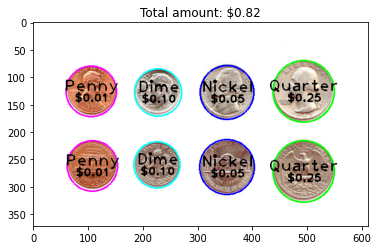

In [ ]:
# Declare variable to retain the total money amount
amount = 0.0

# Get the average color within  a coin
def get_avg_color(x, y, r):
  red = 0
  green = 0
  blue = 0
  square = math.floor(1/2 * r * math.sqrt(2))
  for i in range(square):
     for j in range(square):
        red += image[(y-10+i), (x-10+j)][2]
        green += image[(y-10+i), (x-10+j)][1]
        blue += image[(y-10+i), (x-10+j)][0]
  red = math.ceil(red / (square * square)) * 10 / 10
  green = math.ceil(green / (square * square)) * 10 / 10
  blue = math.ceil(blue / (square * square)) * 10 / 10
  average_color = (red, green, blue)
  return average_color

# Determine which coin is being used
def determine_coin(max_radius, radius, average_color, 
                   font, fontSize, color, fontThickness):
  ratio = radius / max_radius
  if (ratio >= 0.95):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-49, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.01", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 255, 0), 2)
      cv2.putText(output, "Quarter", (x-64, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.25", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
    return 0.25
  elif (ratio < 0.95 and ratio >= 0.82):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-49, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.01", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 0, 255), 2)
      cv2.putText(output, "Nickel", (x-46, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.05", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
    return 0.05
  elif (ratio < 0.82 and ratio >= 0.78):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-49, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.01", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 255, 255), 2)
      cv2.putText(output, "Dime", (x-36, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.10", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
      return 0.10
  elif (ratio < 0.78 and ratio >= 0.68):
    if(average_color[0] / average_color[2] > 1.5):
      cv2.circle(output, (x, y), r, (255, 0, 255), 2)
      cv2.putText(output, "Penny", (x-49, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.01", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
      return 0.01
    else:
      cv2.circle(output, (x, y), r, (0, 255, 255), 2)
      cv2.putText(output, "Dime", (x-36, y), 
                font, fontSize, color, fontThickness)
      cv2.putText(output, "$0.10", (x-30, y+19), 
                font, coinFontSize, color, fontThickness)
      return 0.10
  else:
    cv2.circle(output, (x, y), r, (255, 0, 0), 4)
    cv2.putText(output, "Unknown", (x-66, y), 
                font, fontSize, color, fontThickness)
    return 0

# Find circles
input = cv2.cvtColor(contours, cv2.COLOR_BGR2GRAY)
output = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
circles = cv2.HoughCircles(input,cv2.HOUGH_GRADIENT,1,100,
                           param1=50,param2=30,
                           minRadius=40,maxRadius=120)

# If some circle is found ...
if circles is not None:
   # Get the (x, y, r) as integers
   circles = np.round(circles[0, :]).astype("int")
   # set font requirements
   font = cv2.FONT_HERSHEY_PLAIN
   fontSize = 2
   fontThickness = 2
   color = (0, 0, 0)
   coinFontSize = 1.4
   # Create a mask
   mask = np.zeros_like(median) 
   # loop over the circles and find the maximum radius
   max_rad = 0
   for (x, y, r) in circles:
     if r > max_rad:
       max_rad = r
   # loop over the circles
   for (x, y, r) in circles:
     cv2.circle(mask, (x, y), r, 255, -1)
     #ave_color = round_list(cv2.mean(image, mask=mask)[:3])
     ave_color = get_avg_color(x, y, r)
     amount += determine_coin(max_rad, r, ave_color, font, 
                              fontSize, color, fontThickness)

# Display the image
amount = math.ceil(amount * 100) / 100
title = "Total amount: $" + str(amount)
plt.figure()
plt.title(title)
plt.imshow(output,cmap='gray', vmin=0, vmax=255)